### Liczba tur do ukończenia gry

Zał:
- a = 50
- b = 50
- pA = 1/5, 1/2, 4/5

Szukane:

Prawdopodobieństwo ze gra zakończy się do danej rundy

In [11]:
import numpy as np
import matplotlib.pyplot as plt

In [12]:
def coin_game(p):
  counter = 0
  a = 50
  b = 50
  while a > 0 and b > 0:
    counter += 1
    roll = np.random.uniform(0, 100)
    if p > roll:
        b += 1
        a -= 1
    else:
        a += 1
        b -= 1
  return counter

In [13]:
simulations = 5_000
probabilities = [25, 50, 75]

Średnia długość rundy: 99.9512 dla pA: 25
Średnia długość rundy: 2483.69 dla pA: 50
Średnia długość rundy: 99.74 dla pA: 75


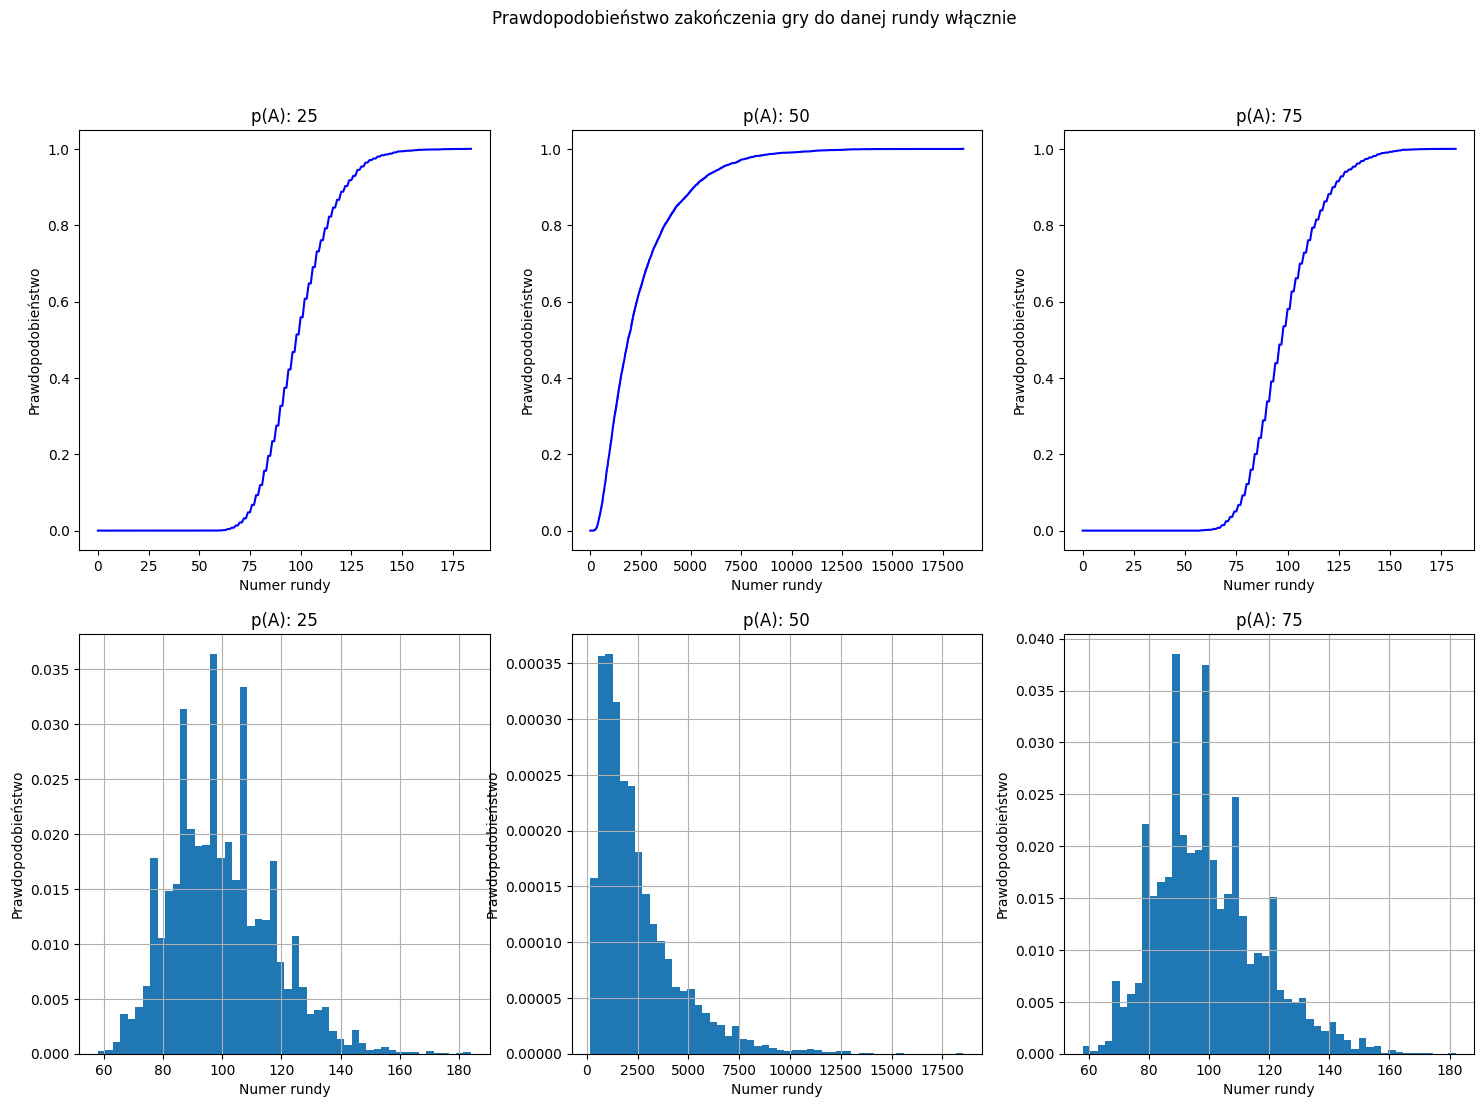

In [23]:
fig, axes = plt.subplots(2, 3, figsize=(18, 12))
fig.suptitle('Prawdopodobieństwo zakończenia gry do danej rundy włącznie')

for i, probability in enumerate(probabilities):
  round_results = [coin_game(probability) for _ in range(simulations)]

  max_rounds = max(round_results)
  occurrences = np.zeros(max_rounds + 1)

  for rounds in round_results:
    occurrences[rounds] += 1

  print(f'Średnia długość rundy: {np.mean(round_results)} dla pA: {probability}')

  pL = np.cumsum(occurrences) / simulations
  ax = axes[0][i]
  ax.plot(range(max_rounds + 1), pL, marker='', linestyle='-', color='blue')
  ax.set_title(f'p(A): {probability}')
  ax.set_xlabel('Numer rundy')
  ax.set_ylabel('Prawdopodobieństwo')

  ax = axes[1][i]
  ax.hist(round_results, bins=50, density=True)
  ax.set_title(f'p(A): {probability}')
  ax.set_xlabel('Numer rundy')
  ax.set_ylabel('Prawdopodobieństwo')

  ax.grid(True)